# Data Cleaning and Modeling for Arizona

## import necessary libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix, classification_report, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

## Import data for Arizona and clean

In [2]:
df = pd.read_csv('Data/covid_cases_per_county.csv')

In [3]:
TX = df[df.State == 'TX']

In [4]:
TX

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30
2566,0,Statewide Unallocated,TX,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2567,48001,Anderson County,TX,48,0,0,0,0,0,0,...,6089,6089,6089,6098,6098,6098,6098,6098,6098,6098
2568,48003,Andrews County,TX,48,0,0,0,0,0,0,...,1710,1710,1733,1739,1739,1739,1739,1739,1739,1739
2569,48005,Angelina County,TX,48,0,0,0,0,0,0,...,8051,8051,8164,8164,8164,8164,8164,8164,8186,8186
2570,48007,Aransas County,TX,48,0,0,0,0,0,0,...,1173,1173,1177,1177,1183,1185,1185,1189,1189,1194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,48499,Wood County,TX,48,0,0,0,0,0,0,...,3308,3308,3316,3324,3324,3336,3336,3336,3336,3336
2817,48501,Yoakum County,TX,48,0,0,0,0,0,0,...,863,863,863,863,865,865,865,865,865,865
2818,48503,Young County,TX,48,0,0,0,0,0,0,...,2129,2129,2129,2129,2130,2130,2131,2131,2131,2131
2819,48505,Zapata County,TX,48,0,0,0,0,0,0,...,1756,1756,1757,1757,1757,1757,1757,1759,1759,1760


In [5]:
TX = TX.drop([2566])

In [6]:
def CasesClean(df):
    df = df.drop(columns = ['countyFIPS','State','StateFIPS'])
    df = df.melt(id_vars=["County Name"], 
        var_name="date", 
        value_name="Cases")
    df = df.rename(columns = {'County Name':'County_Name'})
    df.date = pd.to_datetime(df.date)
    return df

In [7]:
TX = CasesClean(TX)

In [8]:
TX

,County_Name,date,Cases
0,Anderson County,2020-01-22,0
1,Andrews County,2020-01-22,0
2,Angelina County,2020-01-22,0
3,Aransas County,2020-01-22,0
4,Archer County,2020-01-22,0
...,...,...,...
110231,Wood County,2021-03-30,3336
110232,Yoakum County,2021-03-30,865
110233,Young County,2021-03-30,2131
110234,Zapata County,2021-03-30,1760


In [9]:
df2 = pd.read_csv('Data/covid_county_population.csv')

In [10]:
TXpop = df2[df2.State == 'TX']

In [11]:
TXpop

,countyFIPS,County Name,State,population
2568,0,Statewide Unallocated,TX,0
2569,48001,Anderson County,TX,57735
2570,48003,Andrews County,TX,18705
2571,48005,Angelina County,TX,86715
2572,48007,Aransas County,TX,23510
...,...,...,...,...
2818,48499,Wood County,TX,45539
2819,48501,Yoakum County,TX,8713
2820,48503,Young County,TX,18010
2821,48505,Zapata County,TX,14179


In [12]:
TXpop= TXpop.drop([2568])

In [13]:
TXpop = TXpop.drop(columns = ['State', 'countyFIPS'])
TXpop = TXpop.rename(columns = {'County Name':'County_Name'})

In [14]:
df = pd.read_csv('Data/Restaurant_orders.csv')

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



In [15]:
## Cleaner function for restaurant data
def cleanerR(df):
    df['Effective_date'] = pd.to_datetime(df['Effective_date'])
    df.drop(columns = ['Effective_NA_Reason', 'Expiration_NA_Reason','Date_Signed','origin_dataset','Source_of_Action','URL','Citation','FIPS_State','FIPS_County','Action','Jurisdiction_Type','Issuing_Jurisdiction','order_code','Business_Type','Current_order_status','Effective_date','Expiration_date'], inplace = True)
    df.date = pd.to_datetime(df.date)
    df.sort_values(by = 'date', inplace = True)
    dfR = df[df.State_Tribe_Territory  == "TX"]
    dfR.drop(columns = ['State_Tribe_Territory'], inplace = True)
    dfR = dfR.rename(columns = {'order_group':'Rest_order'})
    return dfR

In [16]:
dfRTX = cleanerR(df)

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
dfRTX.Rest_order.value_counts()

Open with limitations     62230
Curbside/delivery only    10668
No restriction found       1270
Name: Rest_order, dtype: int64

In [18]:
df2 = pd.read_csv('Data/Mask_Mandates2.csv')

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (7,8,9,10,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [19]:
## Function to clean Mask Mandates data
def cleanerM(df2):
    df2.drop(columns = ['Jurisdiction_Type','Issuing_Jurisdiction','Date_Signed','origin_dataset','Source_of_Action','URL','Citation'], inplace = True)
    dfM = df2[df2.State_Tribe_Territory  == "TX"]
    dfM.drop(columns = ['FIPS_State', 'Effective_NA_Reason','Expiration_NA_Reason', 'FIPS_County','State_Tribe_Territory','Effective_date','Expiration_date'], inplace = True)
    dfM.date = pd.to_datetime(dfM.date)
    dfM = dfM.rename(columns = {'Current_order_status': 'Mask_order'})
    dfM.sort_values(by = 'date', inplace = True)
    dfM.fillna('NA', inplace = True)
    return dfM

In [20]:
dfMTX = cleanerM(df2)

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
dfMTX

,County_Name,date,Mask_order,Face_Masks_Required_in_Public
749331,Anderson County,2020-04-10,No Public Mask Mandate,NA
800118,Morris County,2020-04-10,No Public Mask Mandate,NA
800415,Motley County,2020-04-10,No Public Mask Mandate,NA
800712,Nacogdoches County,2020-04-10,No Public Mask Mandate,NA
801009,Navarro County,2020-04-10,No Public Mask Mandate,NA
...,...,...,...,...
797741,Medina County,2021-01-31,Public Mask Mandate,Yes
797444,Maverick County,2021-01-31,Public Mask Mandate,Yes
797147,Matagorda County,2021-01-31,Public Mask Mandate,Yes
801008,Nacogdoches County,2021-01-31,Public Mask Mandate,Yes


In [22]:
df3 = pd.read_csv('Data/Gathering_Bans.csv')

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (7,10,13,16,21,23,33,35) have mixed types. Specify dtype option on import or set low_memory=False.



In [23]:
## Function to clean gathering bans data
def cleanerG(df3):
    df3.drop(columns = ['origin_dataset','Source_of_Action','URL','Citation','General_GB_order_code','With_SD_order_code','Outdoor_Household_Order_Code'], inplace = True)
    dfG = df3[df3.State_Tribe_Territory  == "TX"]
    dfG.drop(columns = ['FIPS_State','FIPS_County','Effective_NA_Reason','Expiration_NA_Reason','General_Household_order_code','Express_Preemption','Bans_Households_Not_Individuals_Outdoor_Only','Outdoor_Household_Order_Group','Bans_Households_Not_Individuals_Generally','outdoor_order_group','outdoor_order_code','General_Or_Under_6ft_Bans_Outdoor_Gatherings_Over','Issuing_Jurisdiction','Jurisdiction_Type','With_SD_outdoor_order_code','General_Household_Order_Group','State_Tribe_Territory','Date_Signed','Over_6ft_Bans_Outdoor_Gatherings_Over', 'Indoor_Outdoor','Effective_date','Expiration_date','Over_6ft_Bans_Gatherings_Over','General_or_Under_6ft_Bans_Gatherings_Over','With_SD_outdoor_order_group','Current_order_status'], inplace = True)
    dfG.date = pd.to_datetime(dfG.date)
    dfG.sort_values(by = 'date', inplace = True)
    dfG.fillna('NA', inplace = True)
    return dfG

In [24]:
dfGTX = cleanerG(df3)

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
dfGTX

,County_Name,date,General_GB_order_group,With_SD_order_group
746808,Anderson County,2020-03-11,No order found,No order found
797424,Morris County,2020-03-11,No order found,No order found
797720,Motley County,2020-03-11,No order found,No order found
798016,Nacogdoches County,2020-03-11,No order found,No order found
798312,Navarro County,2020-03-11,No order found,No order found
...,...,...,...,...
795055,Medina County,2020-12-31,Ban of gatherings over 1-10 people,No order found
794759,Maverick County,2020-12-31,Ban of gatherings over 1-10 people,No order found
794463,Matagorda County,2020-12-31,Ban of gatherings over 1-10 people,No order found
798311,Nacogdoches County,2020-12-31,Ban of gatherings over 1-10 people,No order found


In [26]:
## Function to merge all dataframes

def merge(df1, df2, df3, df4, df7):
    df4_copy = df4.copy()
    df7_copy = df7.copy()
    df = df1.merge(df2, how = 'outer',  on =['date','County_Name'])
    df5 = df.merge(df3, how = 'outer', on =['date','County_Name'])
 
    df4_copy.County_Name = [d[1].strip() for d in df4.County_Name.items()]
    df5.County_Name = [d[1].strip() for d in df5.County_Name.items()]
    df7.County_Name = [d[1].strip() for d in df7.County_Name.items()]
    df4_copy.County_Name = df4_copy.County_Name.astype(str)
    df5.County_Name = df5.County_Name.astype(str)
    df4_copy.sort_values(by='County_Name',inplace=True)
    df6 = df5.merge(df4_copy, on=['County_Name','date'], how="outer")
    df8 = df6.merge(df7, on=['County_Name'], how="left")
    df8.sort_values(by='County_Name', inplace=True)
   
    start_date = '2020-03-11'
    end_date = '2021-01-31'
    after_start_date = df8["date"] >= start_date

    before_end_date = df8["date"] <= end_date

    between_two_dates = after_start_date & before_end_date

    final = df8.loc[between_two_dates]
    
    final.sort_values(by = ['date','County_Name'], inplace = True)
    final['Cases/Population'] = final.apply(lambda row: row.Cases/row.population, axis = 1)
    final['Cases/Population'].fillna(0, inplace = True)
    final.fillna('NA', inplace = True)
    R = {'NA':0,'No restriction found':1,'Curbside/delivery only':2,'Open with limitations':3}
    final.Rest_order.replace(R, inplace=True)
    M = {'NA':0,'No Public Mask Mandate' :1,'Public Mask Mandate':2}
    final.Mask_order.replace(M, inplace=True)
    F = {'NA':0,'Yes' :1}
    final.Face_Masks_Required_in_Public.replace(F, inplace=True)
    S = {'NA':0,'Ban of gatherings over 51-100 people' :1,'No order found':2}
    final.With_SD_order_group.replace(S, inplace=True)
    G = {'NA':0,'No order found':1,'Ban of gatherings over 11-25 people':2,'Ban of gatherings over 1-10 people':3,'Bans gatherings of any size':4}
    final.General_GB_order_group.replace(G, inplace=True)
    return final

finaldfTX = merge(dfRTX, dfMTX, dfGTX, TX, TXpop)
finaldfTX

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,County_Name,date,Rest_order,Mask_order,Face_Masks_Required_in_Public,General_GB_order_group,With_SD_order_group,Cases,population,Cases/Population
82042,Anderson County,2020-03-11,0,0,0,1,2,0,57735,0.000000
82273,Andrews County,2020-03-11,0,0,0,1,2,0,18705,0.000000
82125,Angelina County,2020-03-11,0,0,0,1,2,0,86715,0.000000
82118,Aransas County,2020-03-11,0,0,0,1,2,0,23510,0.000000
82111,Archer County,2020-03-11,0,0,0,1,2,0,8553,0.000000
...,...,...,...,...,...,...,...,...,...,...
81949,Wood County,2021-01-31,0,2,1,0,0,2900,45539,0.063682
81948,Yoakum County,2021-01-31,0,2,1,0,0,848,8713,0.097326
81789,Young County,2021-01-31,0,2,1,0,0,1903,18010,0.105664
81914,Zapata County,2021-01-31,0,2,1,0,0,1523,14179,0.107412


In [27]:
finaldfTX.to_csv('Data/Texas_data.csv', index = False)

## Modeling

In [28]:
y = finaldfTX['Cases/Population']
X = finaldfTX.drop(columns = ['Cases/Population', 'County_Name','date','population','Cases'], axis = 1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [30]:
## Model Evaluator Function
def evaluator(X_train, y_train, X_test, y_test, model):   
    start = time.time()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    end = time.time()
    print("Model Time: {}".format(end-start))
    print('R Squared Score is:', r2_score(y_test, test_preds))
    print('Training:')
    print('Mean Absolute Error:', mean_absolute_error(y_train, train_preds))  
    print('Mean Squared Error:', mean_squared_error(y_train, train_preds))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, train_preds)))
    print('Testing:')
    print('Mean Absolute Error:', mean_absolute_error(y_test, test_preds))  
    print('Mean Squared Error:', mean_squared_error(y_test, test_preds))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_preds)))

In [31]:
GBR_best = GradientBoostingRegressor(learning_rate = 0.5,
 max_depth = 4,
 n_estimators = 100,
 random_state= 2,
 subsample= 0.25)

evaluator(x_train, y_train, x_test, y_test, GBR_best)

Model Time: 0.671628475189209
R Squared Score is: 0.5718173999512345
Training:
Mean Absolute Error: 0.011091687834584958
Mean Squared Error: 0.0003127810810516263
Root Mean Squared Error: 0.01768561791545962
Testing:
Mean Absolute Error: 0.011209105047617664
Mean Squared Error: 0.0003128758122805095
Root Mean Squared Error: 0.017688295912283623


In [32]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

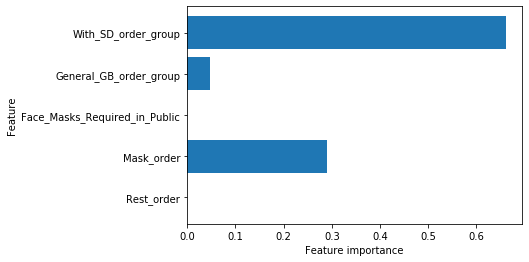

In [33]:
plot_feature_importances(GBR_best)

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



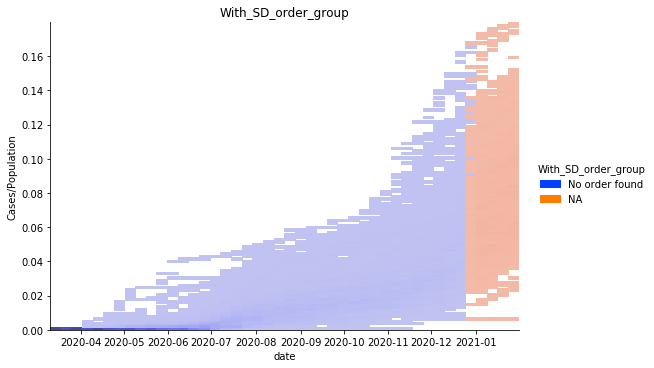

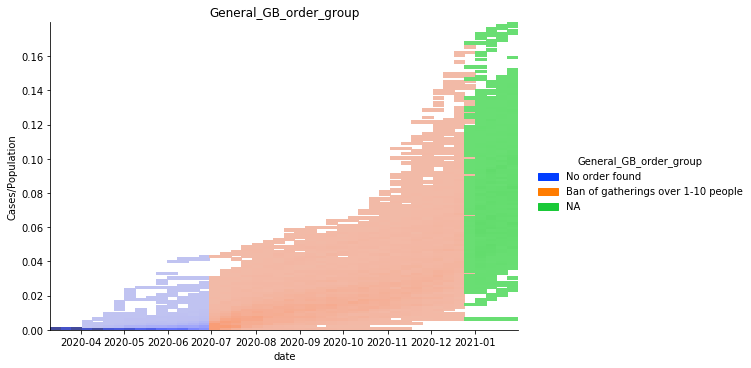

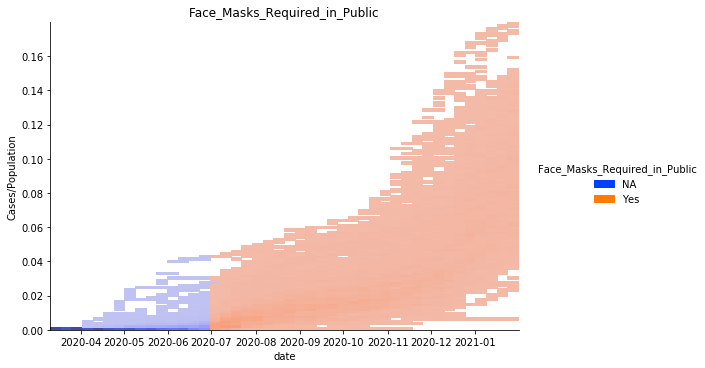

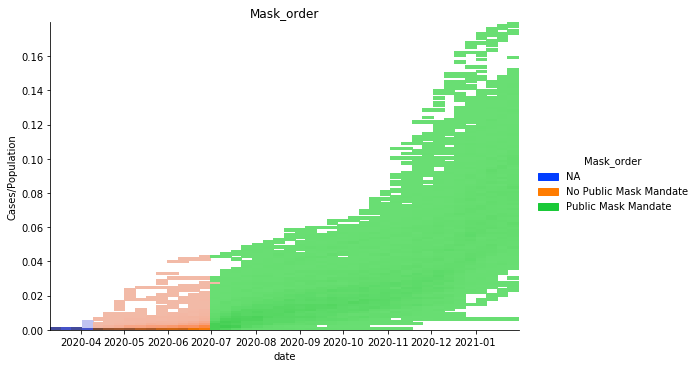

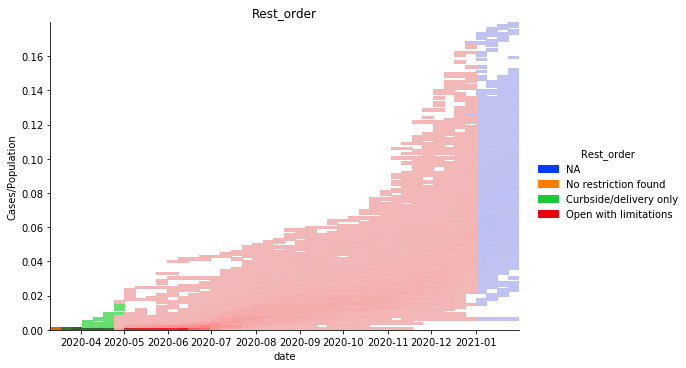

In [34]:
S = {0:'NA',1:'Ban of gatherings over 51-100 people',2:'No order found'}
finaldfTX.With_SD_order_group.replace(S, inplace=True)
G = {0:'NA',1:'No order found',2:'Ban of gatherings over 11-25 people',3:'Ban of gatherings over 1-10 people',4:'Bans gatherings of any size'}
finaldfTX.General_GB_order_group.replace(G, inplace=True)
M = {0:'NA',1:'No Public Mask Mandate',2:'Public Mask Mandate'}
finaldfTX.Mask_order.replace(M, inplace=True)
F = {0:'NA',1:'Yes'}
finaldfTX.Face_Masks_Required_in_Public.replace(F, inplace=True)
R = {0:'NA',1:'No restriction found',2:'Curbside/delivery only',3:'Open with limitations',4:'Authorized to fully reopen'}
finaldfTX.Rest_order.replace(R, inplace=True)


hues = ["With_SD_order_group","General_GB_order_group","Face_Masks_Required_in_Public","Mask_order","Rest_order"]


for hue in hues:
    sns.displot(data = finaldfTX, x = "date", y = "Cases/Population", hue = hue, palette = "bright", aspect = 1.5)
    plt.title(f"{hue}")

In [35]:
finaldfTX['Cases/Population'].mean()

0.02159039752962385